# Hypothesis Testing (Critical Value approach)

This notebook is an example of a hypothesis testing approach. There is of course the p-value approach as well

Keywords: Critical value, critical region, z score, standard error

In [1]:
from __future__ import division
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
from scipy import stats
import math


# turn of data table rendering
pd.set_option('display.notebook_repr_html', False)

sns.set_palette(['#00A99D', '#F5CA0C', '#B6129F', '#76620C', '#095C57'])
np.version.full_version

'1.15.4'

## Data cleaning
The data used in this example contains reporting from the Federal Aviation Administration Wildlife Strike Database in 2012 and 2013 in the US state of California. We only use daily wild life strike incident frequencies.

In [21]:
# Load the data from a csv file. 
data = pd.read_csv('wildlife.csv')

# We only need the incident dates this time
data = data[['INCIDENT_DATE']]
data.INCIDENT_DATE = pd.to_datetime(data.INCIDENT_DATE)
data = data.groupby('INCIDENT_DATE')['INCIDENT_DATE'].size()
data.head()

INCIDENT_DATE
2012-01-02    1
2012-01-04    2
2012-01-05    5
2012-01-06    3
2012-01-07    2
Name: INCIDENT_DATE, dtype: int64

In [33]:
# Set the index to contain all days in 2012 and 2013
df = pd.DataFrame({'date': data.index, 'count': data.values})
days_2012_2013 = pd.date_range('1/1/2012', '12/31/2013')
df = pd.DataFrame(data, index=days_2012_2013)
df.head()

            INCIDENT_DATE
2012-01-01            NaN
2012-01-02            1.0
2012-01-03            NaN
2012-01-04            2.0
2012-01-05            5.0

In [38]:
# Fill the data with no strike incidents (NaN) with a zero
data = data.fillna(0)
data.head()

INCIDENT_DATE
2012-01-02    1
2012-01-04    2
2012-01-05    5
2012-01-06    3
2012-01-07    2
Name: INCIDENT_DATE, dtype: int64

## Hypothesis testing

Let's asume that the Federal Aviation Administration launched a new Wildlife Strike Prevention Program in 2013. We want to know if there is a significant decline in the number of daily strike incidents in 2013 as opposed to 2012. This forms our operational definition. We choose an alpha level of .05 as our level of significance. A probability smaller than the alpha level leads to rejecting the null hypothesis.

**Get population $\mu$ and $\sigma$**

In [46]:
# We assume stats from the wildlife strike incidents in 2012
# to be our population parameters
mu = df['2012'].INCIDENT_DATE.mean()
sigma = df['2012'].INCIDENT_DATE.std()
mu, sigma

(2.5546448087431695, 1.6818182461905788)

**Get sample mean $\bar{x}$**

In [47]:
# We also take the average of strike incidents in 2013
xbar = df['2013'].INCIDENT_DATE.mean()
xbar

2.4328767123287673

In [49]:
# What is our sample size
n = df['2013'].INCIDENT_DATE.count()
n

365

**Get Standard Error**

$\frac{\sigma}{\sqrt{n}}$

In [50]:
# Calculate the standard error
SE = sigma / math.sqrt(n)
SE

0.08803039035048665

We notice the mean average wildlife strike incidents is somewhat lower in 2013. We need to find out if this is due to the normal variation in the data. In other words, could we draw this mean by pure random chance? To find out, we calculate the z score for our sample mean and check this against the significance level alpha.

**Find Z Score for sample mean**

In [51]:
# Calculate the z score for the mean of 2013 (xbar)
zscore = (xbar - mu) / SE
zscore

-1.3832506697924571

In [52]:
# Calculate the critical value of the alpha level on one side of the
# distribution, because we're only intrested in a mean decline
alpha = .05
critical_value = stats.norm.ppf(alpha)
critical_value

-1.6448536269514729

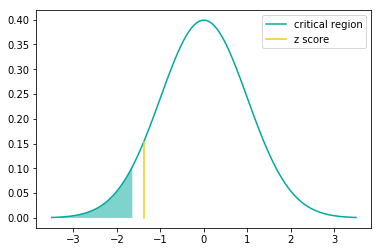

In [57]:
# Plot the normal distribution
samples = 100
x_plot = np.linspace(-3.5, 3.5, samples)
y_plot =stats.norm.pdf(x_plot, 0, 1)
plt.plot(x_plot, y_plot)

# Plot the critical region
x_crit = np.linspace(-3.5, critical_value, samples)
y_crit = stats.norm.pdf(x_crit, 0,1)
plt.fill_between(x_crit, y_crit, alpha = .5)

# plot the z score
plt.plot([zscore, zscore],[0,stats.norm.pdf(zscore)])

# Show legend
plt.legend(['critical region', 'z score'])
plt.show()

In [ ]:
# So given these values let's test the alternative hypothesis
zscore < critical_value

This means we could have drawn a mean sample xbar from the real population pure by random chance, therefore we fail to reject the null hypothesis. In other words, there is no significant difference of average daily strike incidents between 2013 and 2012.

In [58]:
# The probability of drawing this sample mean is about 8%
p = stats.norm.cdf(zscore)
p

0.083294009028341